In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as ts
from statsmodels.iolib.summary2 import summary_col

### STARGAZER ###

from stargazer.stargazer import Stargazer, LineLocation

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/df_nzgas_excl_coal.csv'
df = pd.read_csv(url)
df["DATE"] = pd.to_datetime(df["DATE"],dayfirst=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')

df["nzbtuusd_r"] = (df["NZBTU_USD"].pct_change())
df = df.dropna()
print(df)

         DATE  Price_NZ    NZ_BTU  NZ_USD_Q  NZBTU_USD        HH    NBP_raw  \
1  1999-06-01  2.936804  3.098492  0.537400   1.665130  2.290000   9.510690   
2  1999-09-01  2.698549  2.847121  0.521433   1.484584  2.693333   9.767143   
3  1999-12-01  2.827617  2.983294  0.511567   1.526154  2.383333  10.796316   
4  2000-03-01  2.871244  3.029323  0.493033   1.493557  2.830000  14.691452   
5  2000-06-01  2.719361  2.869078  0.467333   1.340816  3.956667  17.860968   
..        ...       ...       ...       ...        ...       ...        ...   
85 2020-06-01  6.278793  6.624478  0.637233   4.221338  1.716667  17.556032   
86 2020-09-01  6.594163  6.957211  0.663333   4.614950  2.203333  23.882985   
87 2020-12-01  6.825113  7.200877  0.704467   5.072778  2.636667  36.814286   
88 2021-03-01  7.414286  7.822487  0.717100   5.609505  3.543333  49.338936   
89 2021-06-01  9.099814  9.600814  0.710567   6.822018  3.336667  60.539615   

     NBP_USD      Brent  GBP_USD  nzbtuusd_r  
1   

In [2]:
mod = sm.tsa.MarkovRegression(df["nzbtuusd_r"], k_regimes=2, switching_variance = True)
res_mod = mod.fit()
res_mod.summary()

/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:             nzbtuusd_r   No. Observations:                   89
Model:               MarkovRegression   Log Likelihood                  83.925
Date:                Sun, 05 Jun 2022   AIC                           -155.851
Time:                        15:55:48   BIC                           -140.919
Sample:                             0   HQIC                          -149.832
                                 - 89                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0143      0.019     -0.732      0.464      -0.052       0.024
sigma2         0.0045      0.002      2.638      0.008       0.001       0.008
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0456      0.024      1.890      0.059      -0.002       0.093
sigma2         0.0110      0.003      3.800      0.000       0.005       0.017
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.8121      0.189      4.292      0.000       0.441       1.183
p[1->0]        0.1333      0.189      0.707      0.480      -0.237       0.503
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

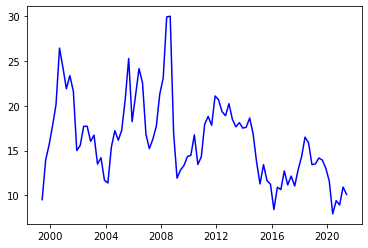

In [3]:
df['ratio'] = df["Brent"]/df["NZBTU_USD"]
plt.plot(df['DATE'],df['ratio'],color='blue')

In [5]:
mod = sm.tsa.MarkovRegression(df["NZBTU_USD"], k_regimes=2, switching_variance = True)
res_mod = mod.fit()
res_mod.summary()

/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:              NZBTU_USD   No. Observations:                   89
Model:               MarkovRegression   Log Likelihood                -115.279
Date:                Sun, 05 Jun 2022   AIC                            242.558
Time:                        15:56:19   BIC                            257.490
Sample:                             0   HQIC                           248.577
                                 - 89                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4686      0.059     24.803      0.000       1.353       1.585
sigma2         0.0600      0.021      2.874      0.004       0.019       0.101
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5779      0.134     34.050      0.000       4.314       4.841
sigma2         1.2703      0.215      5.901      0.000       0.848       1.692
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9808      0.027     36.209      0.000       0.928       1.034
p[1->0]        0.0095      0.011      0.900      0.368      -0.011       0.030
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [ ]:
mod_1 = sm.tsa.MarkovRegression(df["ratio"], k_regimes=2, switching_variance = True)
res_mod_1 = mod_1.fit()
mod_2 = sm.tsa.MarkovRegression(df["ratio"], k_regimes=3, switching_variance = True)
res_mod_2 = mod_2.fit()
mod_3 = sm.tsa.MarkovRegression(df["ratio"], k_regimes=4, switching_variance = True)
res_mod_3 = mod_3.fit()

In [ ]:
res_mod.filtered_marginal_probabilities[1].plot(
    title='Probability of being in high price ratio regime', figsize=(12,2))
plt.savefig('/Users/joe/Dropbox/PhD/Writing/TeX/Charts/nzbrentmarkovprob.png', dpi=400)

In [ ]:
print(res_mod.summary().as_latex())

In [ ]:
## example code for latex summary_col([reg0,reg1,reg2],stars=True,float_format='%0.2f') ##